In [ ]:
import pandas as pd


# Desde un DataFrame
datos = pd.read_csv("cafedato.csv")

print(datos.columns)

Index(['date', 'datetime', 'hour_of_day', 'cash_type', 'card', 'money',
       'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort',
       'Monthsort'],
      dtype='object')


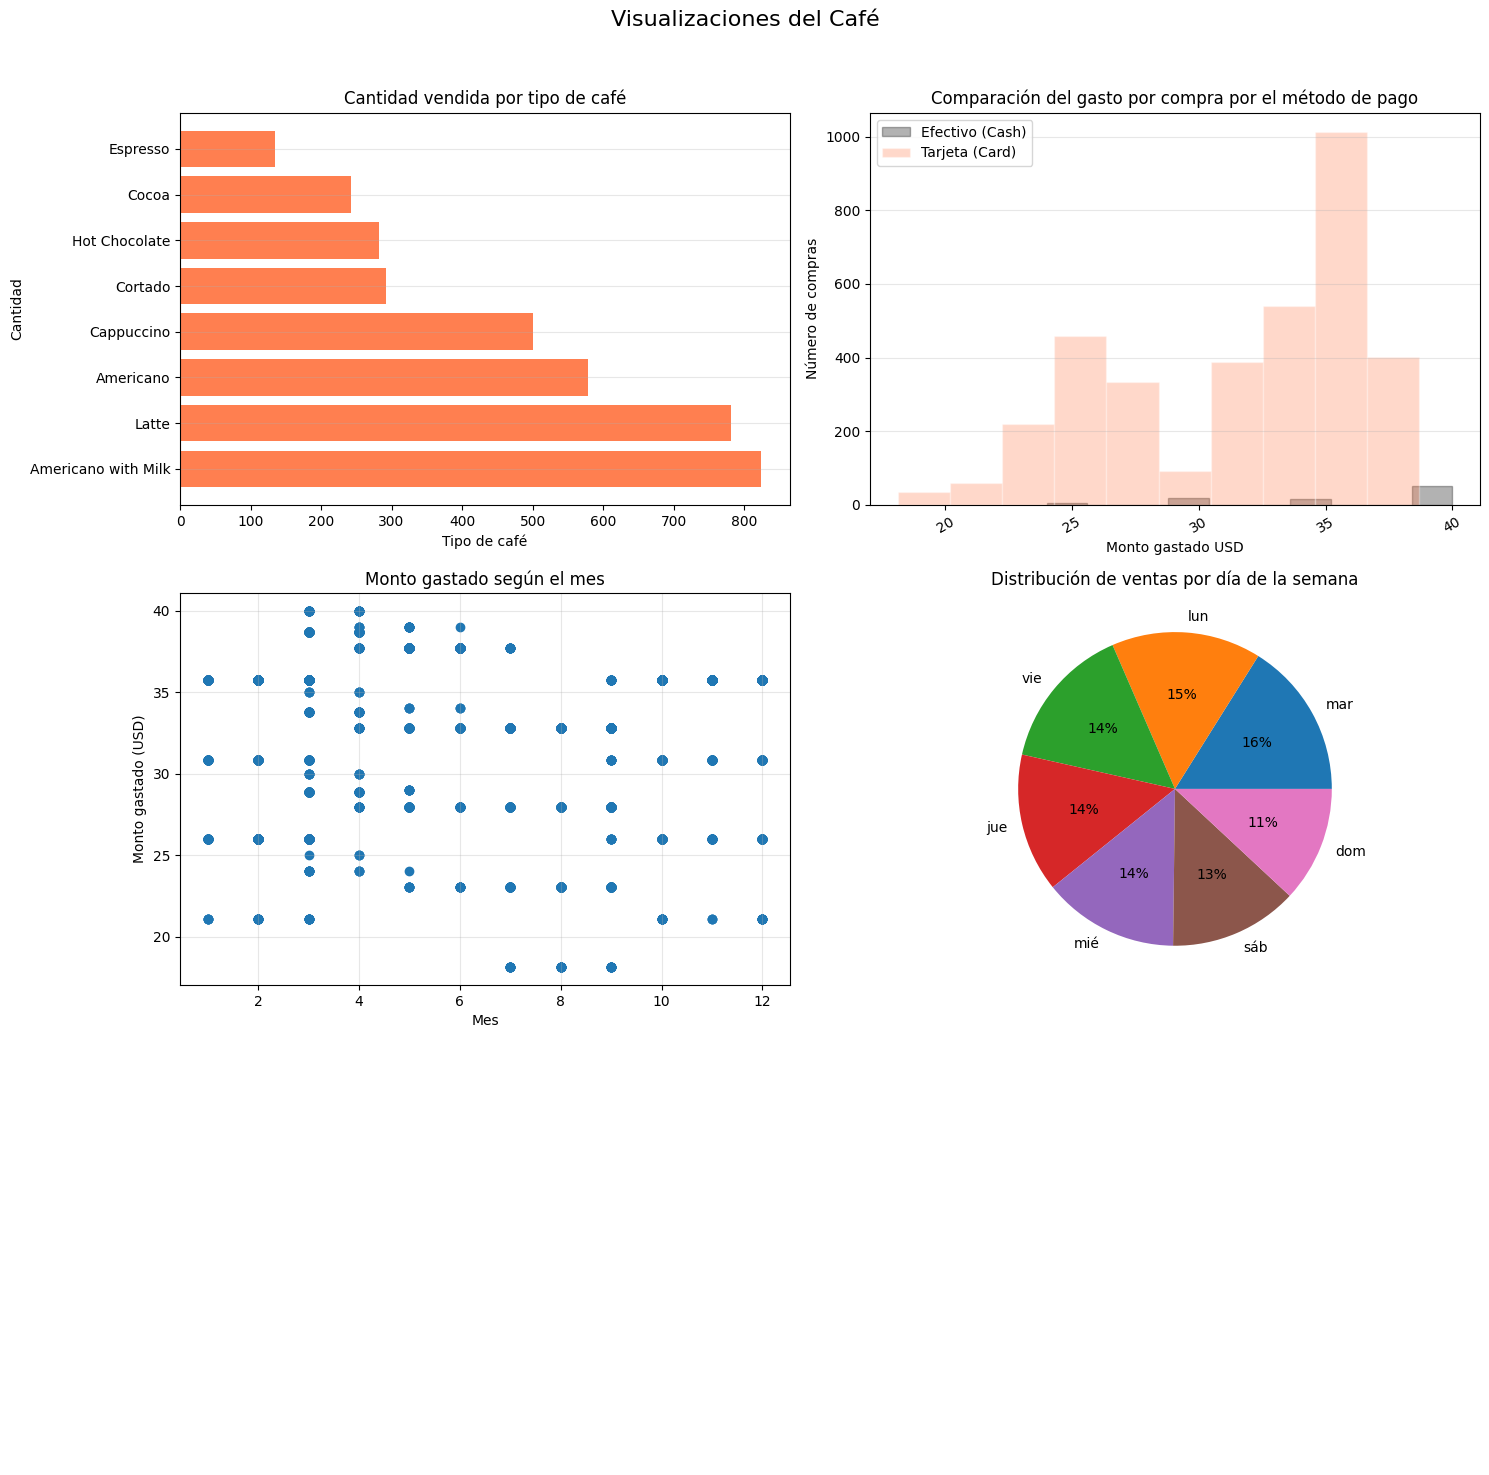

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Cargar datos una sola vez ---
datos = pd.read_csv("cafedatoss.csv")
df = pd.read_csv("cafedatoss.csv")

# Crear figura general con subplots 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Visualizaciones del Café", fontsize=16)

# 1️⃣ PRIMER GRÁFICO - BARRAS HORIZONTALES

contar_cafe = datos["coffee_name"].value_counts()

axes[0,0].barh(contar_cafe.index, contar_cafe.values, color="coral")
axes[0,0].set_title("Cantidad vendida por tipo de café")
axes[0,0].set_xlabel("Tipo de café")
axes[0,0].set_ylabel("Cantidad")
axes[0,0].grid(axis="y", alpha=0.3)

# Historia
# El gráfico muestra que Americano with milk es el producto más vendido,
# lo que indica una preferencia clara por este tipo de café entre los clientes.
# Los cafés con menos ventas podrían necesitar promociones

# 2️⃣ SEGUNDO GRÁFICO - HISTOGRAMA CASH VS CARD

axes[0,1].hist(df[df["cash_type"] == "cash"]["money"], bins=10, alpha=0.3, edgecolor="black", color="black", label="Efectivo (Cash)")
axes[0,1].hist(df[df["cash_type"] == "card"]["money"], bins=10, alpha=0.3, edgecolor="white", color="coral", label="Tarjeta (Card)")
axes[0,1].set_title("Comparación del gasto por compra por el método de pago")
axes[0,1].set_xlabel("Monto gastado USD")
axes[0,1].set_ylabel("Número de compras")
axes[0,1].legend()
axes[0,1].grid(axis="y", alpha=0.3)
axes[0,1].tick_params(axis="x", rotation=30)

# Historia
# El gráfico muestra cuánto dinero gastan los clientes, si pagan con tarjeta o efectivo.
# La mayoría de las personas paga con tarjeta.
# Cuando pagan con tarjeta, normalmente gastan entre $25 y $35.
# Muy pocas personas usan efectivo, y los montos son más variados.
# conclusion:
# Las compras con tarjeta son mucho más comunes que las hechas con efectivo.

# 3️⃣ TERCER GRÁFICO - SCATTER

axes[1,0].scatter(df["Monthsort"], df["money"])
axes[1,0].set_title("Monto gastado según el mes")
axes[1,0].set_xlabel("Mes")
axes[1,0].set_ylabel("Monto gastado (USD)")
axes[1,0].grid(True, alpha=0.3)

# Historia
# Cada punto representa una compra.
# La posición del punto muestra en qué mes ocurrió y cuánto se gastó.
# La mayoría de los puntos están a alturas iguales, y significa
# que los gastos fueron iguales durante todo el año.

# 4️⃣ CUARTO GRÁFICO - PIE CHART

conteo_dias = datos["Weekday"].value_counts()

axes[1,1].pie(conteo_dias, labels=conteo_dias.index, autopct="%d%%")
axes[1,1].set_title("Distribución de ventas por día de la semana")

# Historia
# Las ventas son más altas a inicios de semana y más bajas el fin de semana.
# osea que se podria hacer promociones sábado y domingo puede ayudar a subir las ventas.

# --- Los últimos espacios quedan vacíos ya que solo hay 4 gráficos ---
axes[2,0].axis("off")
axes[2,1].axis("off")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])

# GUARDAR LA IMAGEN EN ALTA RESOLUCIÓN
plt.savefig("dashboard_cafe.png", dpi=300, bbox_inches="tight")

# Mostrar todo
plt.show()
